In [1]:
num_of_lines=800

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

patient_level__ver_12_proj1_sn_5_13=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')

patient_level__ver_12_proj1_sn_5_13=pd.DataFrame(patient_level__ver_12_proj1_sn_5_13.iloc[:num_of_lines, :])


print(patient_level__ver_12_proj1_sn_5_13.shape)
patient_level__ver_12_proj1_sn_5_13.head()


(800, 70)


,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [57]:
patient_level__ver_12_proj1_sn_5_13 = patient_level__ver_12_proj1_sn_5_13.dropna(axis=0)
print(patient_level__ver_12_proj1_sn_5_13.shape)

(800, 70)


In [17]:
no_apachi0=patient_level__ver_12_proj1_sn_5_13[patient_level__ver_12_proj1_sn_5_13['APACHEII']>0]

In [18]:
no_apachi0.shape

(194, 70)

In [13]:
patient_level__ver_12_proj1_sn_5_13.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Length: 800, dtype: int64

# select vars:

In [19]:
x1 = no_apachi0[['age','BMI','APACHEII','trauma','metabolic','gastrointestinal','Sepsis','pro_to_target_day0','pro_to_target_day1','pro_to_target_day2','pro_to_target_day3','pro_to_target_day4','pro_to_target_day5']]
print(x1.shape)

(194, 13)


In [4]:
x1.isnull().sum(axis = 0)

age                   0
BMI                   0
APACHEII              0
trauma                0
metabolic             0
gastrointestinal      0
Sepsis                0
pro_to_target_day0    0
pro_to_target_day1    0
pro_to_target_day2    0
pro_to_target_day3    0
pro_to_target_day4    0
pro_to_target_day5    0
dtype: int64

In [20]:
target = no_apachi0[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
4,0
5,0
7,1


In [21]:
target.value_counts(normalize=True) * 100

ICU_mortality
0                76.28866
1                23.71134
dtype: float64

LabelEncoder:

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in x1.columns:
    x1[col] = labelencoder.fit_transform(x1[col].astype(str))
x1.head()

<ipython-input-22-2688ea027796>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[col] = labelencoder.fit_transform(x1[col].astype(str))


,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5
0,44,42,7,0,1,0,1,159,133,146,114,143,127
1,31,98,14,0,1,0,1,111,0,54,141,24,0
4,33,96,8,1,1,1,0,2,96,67,101,138,114
5,30,103,17,0,1,0,1,68,16,92,79,30,0
7,52,85,23,0,1,1,1,89,0,0,102,129,110


# train_test_split

In [38]:

from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, target, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5
41,47,70,23,0,0,1,1,96,77,65,44,37,0
58,6,10,9,1,0,0,0,161,153,157,166,80,0
25,30,65,11,1,1,0,1,7,48,89,90,92,70
287,43,75,28,0,0,0,1,14,41,40,40,12,10
236,11,27,9,0,0,0,0,55,70,89,90,92,27


# models review:

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def stats(y_test,y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
    score = f1_score(y_test, y_pred, average='binary')
    print('accuracy_score: %.3f' % accuracy)
    print('recall: %.3f' % recall)
    print('precision: %.3f' % precision)
    print('F-Measure: %.3f' % score)

In [25]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection # for command model_selection.cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



results = []
names = []
for name, model in models:
    
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)

    
    print('---------%s---------' % name)
    stats(y_test,y_pred)

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

---------LR---------
accuracy_score: 0.763
recall: 0.000
precision: 0.000
F-Measure: 0.000
---------LDA---------
accuracy_score: 0.763
recall: 0.000
precision: 0.000
F-Measure: 0.000
---------KNN---------
accuracy_score: 0.661
recall: 0.000
precision: 0.000
F-Measure: 0.000
---------DT---------
accuracy_score: 0.678
recall: 0.462
precision: 0.333
F-Measure: 0.387
---------RF---------
accuracy_score: 0.746
recall: 0.077
precision: 0.250
F-Measure: 0.118
---------NB---------
accuracy_score: 0.763
recall: 0.077
precision: 0.333
F-Measure: 0.125
---------SVM---------
accuracy_score: 0.780
recall: 0.000
precision: 0.000
F-Measure: 0.000


c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# transform data
#x_train2 = scaler.fit_transform(x_train)
#x_test2 = scaler.fit_transform(x_test)

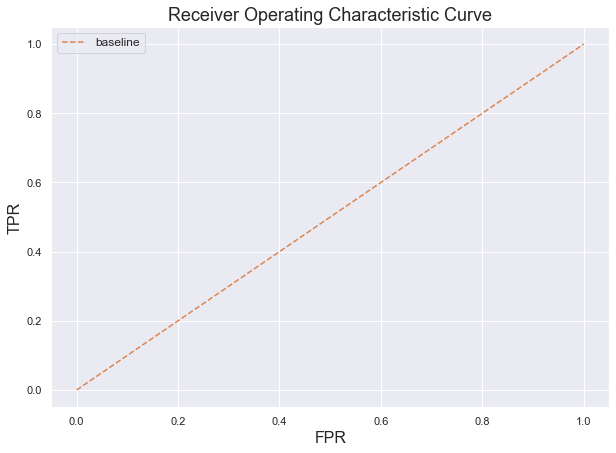

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

models = []

models.append(('DT', DecisionTreeClassifier()))
#models.append(('RF', RandomForestClassifier()))
for name, model in models:
    
    model.fit(x_train2, y_train) 
    y_pred = model.predict(x_test2)
    
    roc_values = []
    for thresh in np.linspace(0, 1, 100):
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        roc_values.append([tpr, fpr])
    tpr_values, fpr_values = zip(*roc_values)
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(fpr_values, tpr_values)
    ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
    plt.title('Receiver Operating Characteristic Curve', fontsize=18)
    plt.ylabel('TPR', fontsize=16)
    plt.xlabel('FPR', fontsize=16)
    plt.legend(fontsize=12);




to fix!

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 5
False Positives: 10
True Negatives: 32
False Negatives: 12


# DecisionTreeClassifier

In [47]:


dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
recall = recall_score(y_test, pred, average='binary')
print('recall: %.3f' % recall)
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))
recall = recall_score(y_test, pred, average='binary')
print('recall: %.3f' % recall)


Criterion=gini 0.6101694915254238
recall: 0.294
Criterion=entropy 0.6610169491525424
recall: 0.353


In [48]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(recall_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(recall_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

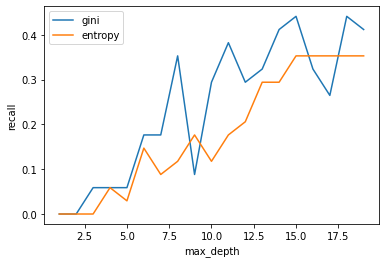

In [45]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()
#parameters: targets to be predicted and predictions from new data used before

In [ ]:
#explain:

# visual tree:

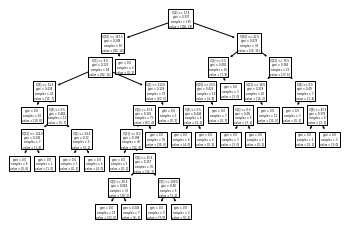

In [49]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=8)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

explore by depth

# RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 40, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

In [68]:
predictionforest = model.best_estimator_.predict(x_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

[[187   0]
 [ 53   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       187
           1       0.00      0.00      0.00        53

    accuracy                           0.78       240
   macro avg       0.39      0.50      0.44       240
weighted avg       0.61      0.78      0.68       240



c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

(266, 8)

(266,)

0.55

Criterion=gini 0.575
Criterion=entropy 0.525


0.6625